In [1]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2021DriversDB.csv')

print(df.head())

            Driver  Year  Points  Team_Points
0   Lewis Hamilton  2021   387.5        613.5
1   Max Verstappen  2021   395.5        585.5
2  Valtteri Bottas  2021   226.0        613.5
3     Sergio Perez  2021   190.0        585.5
4  Charles Leclerc  2021   159.0        323.5


In [3]:
df.info()

df.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Driver       141 non-null    object 
 1   Year         141 non-null    int64  
 2   Points       137 non-null    float64
 3   Team_Points  137 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ KB


In [4]:
winper = []

for i in df.index:
    temp = df.loc[i, 'Points'] / df.loc[i, 'Team_Points']
    winper.append(temp)
    
print(winper)

[0.6316218418907905, 0.6754910333048676, 0.36837815810920943, 0.32450896669513235, 0.49149922720247297, 0.508500772797527, 0.5818181818181818, 0.41818181818181815, 0.7746478873239436, 0.22535211267605634, 0.5225806451612903, 0.4774193548387097, 0.5584415584415584, 0.44155844155844154, 0.6956521739130435, 0.30434782608695654, 0.7692307692307693, 0.23076923076923078, 0.6055846422338569, 0.670846394984326, 0.38917975567190227, 0.625, 0.7480916030534351, 0.5198019801980198, 0.4801980198019802, 0.6574585635359116, 0.7009345794392523, 0.3425414364640884, 0.25190839694656486, 0.375, 0.5, 0.5, 0.5588633288227334, 0.6666666666666666, 0.44113667117726657, 0.7123287671232876, 0.5238095238095238, 0.6620689655172414, 0.33793103448275863, 0.5934065934065934, 0.2581967213114754, 0.7619047619047619, 0.47619047619047616, 0.2876712328767123, 0.7543859649122807, 0.24561403508771928, 0.6229007633587786, 0.594272076372315, 0.37709923664122136, 0.5585585585585585, 0.8125, 0.4344262295081967, 0.4057279236276

In [5]:
df['Team_points_share'] = winper

print(df.head())

            Driver  Year  Points  Team_Points  Team_points_share
0   Lewis Hamilton  2021   387.5        613.5           0.631622
1   Max Verstappen  2021   395.5        585.5           0.675491
2  Valtteri Bottas  2021   226.0        613.5           0.368378
3     Sergio Perez  2021   190.0        585.5           0.324509
4  Charles Leclerc  2021   159.0        323.5           0.491499


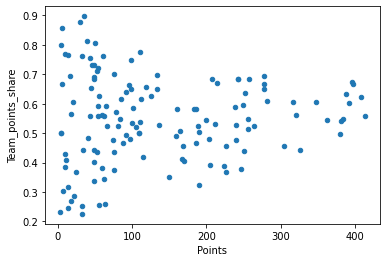

In [6]:
df.plot(kind = 'scatter', x = 'Points', y = 'Team_points_share')

plt.show()

In [7]:
newdf = df.sort_values(by='Team_points_share')

print(newdf.head())

newdf = df.sort_values(by='Team_points_share', ascending=False)

print(newdf.head())

                Driver  Year  Points  Team_Points  Team_points_share
9         Yuki Tsunoda  2021    32.0        142.0           0.225352
17  Antonio Giovinazzi  2021     3.0         13.0           0.230769
48  Antonio Giovinazzi  2019    14.0         57.0           0.245614
28    Sebastian Vettel  2020    33.0        131.0           0.251908
97      Kimi Räikkönen  2014    55.0        216.0           0.254630
               Driver  Year  Points  Team_Points  Team_points_share
124  Sebastian Vettel  2008    35.0         39.0           0.897436
56       Pierre Gasly  2018    29.0         33.0           0.878788
58       Lance Stroll  2018     6.0          7.0           0.857143
53    Charles Leclerc  2018    39.0         48.0           0.812500
61    Fernando Alonso  2018    50.0         62.0           0.806452


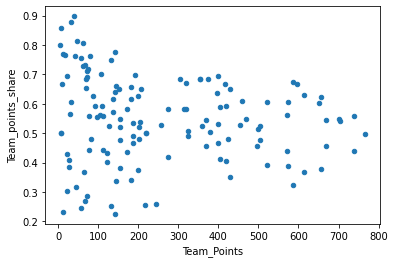

In [8]:
df.plot(kind = 'scatter', x = 'Team_Points', y = 'Team_points_share')

plt.show()

In [9]:
final = pd.DataFrame(columns=['Driver', 'Team_points_share_across_career', 'Seasons_raced'])
drivers = []

In [10]:
for i in df.index:
    if(df.loc[i, 'Driver'] not in drivers):
        drivers.append(df.loc[i, 'Driver'])

In [11]:
print(drivers)
final['Driver'] = drivers
final['Team_points_share_across_career'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
final['Seasons_raced'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

['Lewis Hamilton', 'Max Verstappen', 'Valtteri Bottas', 'Sergio Perez', 'Charles Leclerc', 'Carlos Sainz', 'Lando Norris', 'Daniel Ricciardo', 'Pierre Gasly', 'Yuki Tsunoda', 'Fernando Alonso', 'Esteban Ocon', 'Sebastian Vettel', 'Lance Stroll', 'George Russell', 'Nicholas Latifi', 'Kimi Räikkönen', 'Antonio Giovinazzi']


In [13]:
for x in final.index:
    for i in df.index:
        if(final.loc[x, 'Driver'] == df.loc[i, 'Driver']):
            temp = df.loc[i, 'Team_points_share']
            final.loc[x, 'Team_points_share_across_career'] = final.loc[x, 'Team_points_share_across_career'] + temp
            final.loc[x, 'Seasons_raced'] = final.loc[x, 'Seasons_raced'] + 1

In [14]:
final.head()

,Driver,Team_points_share_across_career,Seasons_raced
0,Lewis Hamilton,8.401035,15
1,Max Verstappen,5.040979,8
2,Valtteri Bottas,4.558756,9
3,Sergio Perez,5.536776,11
4,Charles Leclerc,2.575900,4


In [16]:
for x in final.index:
    final.loc[x, 'Team_points_share_across_career'] = final.loc[x, 'Team_points_share_across_career'] / final.loc[x, 'Seasons_raced']

In [17]:
print(final)

                Driver  Team_points_share_across_career  Seasons_raced
0       Lewis Hamilton                         0.560069             15
1       Max Verstappen                         0.630122              8
2      Valtteri Bottas                         0.506528              9
3         Sergio Perez                         0.503343             11
4      Charles Leclerc                         0.643975              4
5         Carlos Sainz                         0.525759              7
6         Lando Norris                         0.466649              3
7     Daniel Ricciardo                         0.523557             10
8         Pierre Gasly                         0.674894              5
9         Yuki Tsunoda                         0.225352              1
10     Fernando Alonso                         0.637704             16
11        Esteban Ocon                         0.431661              4
12    Sebastian Vettel                         0.570282             15
13    

In [21]:
final.sort_values(by='Team_points_share_across_career', ascending=False)

,Driver,Team_points_share_across_career,Seasons_raced
14,George Russell,0.695652,1
8,Pierre Gasly,0.674894,5
4,Charles Leclerc,0.643975,4
10,Fernando Alonso,0.637704,16
1,Max Verstappen,0.630122,8
12,Sebastian Vettel,0.570282,15
0,Lewis Hamilton,0.560069,15
16,Kimi Räikkönen,0.534240,19
5,Carlos Sainz,0.525759,7
7,Daniel Ricciardo,0.523557,10
